In [ ]:
%reset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import probability_plot as pp

In [2]:
sns.set_style("white")

In [ ]:
scores = np.concatenate((np.random.uniform(low=0.9, high=1, size=150),
                       np.random.uniform(low=0.8, high=0.9, size=75),
                       np.random.uniform(low=0.7, high=0.8, size=50),
                       np.random.uniform(low=0.5, high=0.7, size=25),
                       np.random.uniform(low=0, high=0.1, size=150),
                       np.random.uniform(low=0.1, high=0.2, size=75),
                       np.random.uniform(low=0.2, high=0.3, size=50),
                       np.random.uniform(low=0.3, high=0.5, size=25),
                       np.random.uniform(low=0.5, high=1, size=30),
                       np.random.uniform(low=0, high=0.5, size=30)))

act_label = np.concatenate((np.ones(300), np.zeros(300), np.zeros(30), np.ones(30)))

threshold = 0.5

pred_label = (scores > 0.5) + 0

cal_1 = pred_label + act_label
cal_2 = pred_label - act_label

df = pd.DataFrame({'scores': scores, 'actual_label': act_label, 'pred_label': pred_label, 'group': ''})

df.at[cal_1==2, 'group'] = 'TP'
df.at[cal_1==0, 'group'] = 'TN'
df.at[cal_2==1, 'group'] = 'FP'
df.at[cal_2==-1, 'group'] = 'FN'

spread = 0.3

df['position'] = df['actual_label'] + np.random.uniform(low=-spread, high=spread, size=len(df))

In [18]:
df.head()

,scores,actual_label,pred_label,group,position
0,0.941855,1.0,1,TP,0.817176
1,0.938017,1.0,1,TP,1.076909
2,0.977969,1.0,1,TP,1.198487
3,0.967275,1.0,1,TP,1.299960
4,0.907474,1.0,1,TP,0.968631


In [ ]:
sns.scatterplot(x='position', y='scores', hue='group', s=20, data=df)
plt.hlines(0.5, -0.3, 1.3, color='red')
plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0)
plt.xticks([0,1])
plt.xlabel('Actual label')
plt.ylabel('Scores')
plt.title('Scatterplot of Model Scores (Cutoff Point: 0.5)', fontsize=16)
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



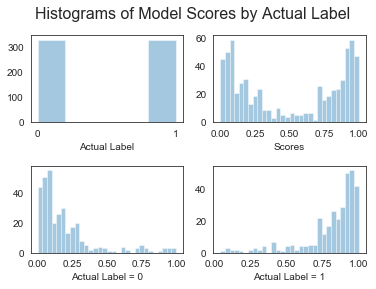

In [33]:
plt.subplot(221)
sns.distplot(df.actual_label, kde=False)
plt.xlabel('Actual Label')
plt.xticks([0,1])
plt.subplot(222)
sns.distplot(df.scores, bins=30, kde=False)
plt.xlabel('Scores')
plt.xticks([0,0.25,0.5,0.75,1])
plt.suptitle('Histograms of Actual Labels and Model Scores', fontsize=16)
plt.subplots_adjust(hspace=0.5)
plt.subplot(223)
sns.distplot(df.scores[df.actual_label==0], bins=30, kde=False)
plt.xlabel('Actual Label = 0')
plt.subplot(224)
sns.distplot(df.scores[df.actual_label==1], bins=30, kde=False)
plt.xlabel('Actual Label = 1')
plt.suptitle('Histograms of Model Scores by Actual Label', fontsize=16)
plt.show()

In [30]:
import probability_plot as pp

In [31]:
x = pp.probability_plot(scores=df.scores, actual_label=df.actual_label, threshold=0.5, spread=0.4)

In [ ]:
x.plot_jitter()

In [6]:
import plotly
plotly.tools.set_credentials_file(username='liuy379', api_key='bRz3MQXDVZGWgv4zCgBk')

In [7]:
import plotly.plotly as py
import plotly.graph_objs as go

In [19]:
df.head()

,scores,actual_label,pred_label,group,position
0,0.941855,1.0,1,TP,0.817176
1,0.938017,1.0,1,TP,1.076909
2,0.977969,1.0,1,TP,1.198487
3,0.967275,1.0,1,TP,1.299960
4,0.907474,1.0,1,TP,0.968631


In [34]:
trace1 = go.Histogram(
    x=df.scores,
    histnorm='percent',
    xbins=dict(
        size=0.01
    ),
    marker=dict(
        color='lightblue',
    ),
    opacity=0.75
)
layout = go.Layout(
    title='Sampled Results',
    xaxis=dict(
        title='Value'
    ),
    yaxis=dict(
        title='Count'
    ),
    bargap=0.1,
)
data = [trace1]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead

